In [1]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset into dataframe

data = pd.read_csv('Books_Data.csv')      
df = data.copy()
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [3]:
# checking for missing values

df.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [40]:
# checking the shape of the dataset

df.shape

print(f'There are {df.shape[0]} rows in the dataset')
print(f'There are {df.shape[1]} columns in the dataset')

There are 1063 rows in the dataset
There are 16 columns in the dataset


In [5]:
#checking the datatypes

df.dtypes

index                    int64
Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

In [6]:
# checking the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [7]:
# statistical description of numerical values 

df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [8]:
# checking the columns in the dataset

df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [9]:
# checking for duplicates

duplicates_count = df.duplicated().sum()
print (f' There are {duplicates_count} duplicates')

 There are 0 duplicates


### Data Cleaning


In [10]:
# dropping the missing value row n the year column since its a single row

df = df.dropna(subset =['Publishing Year'] )

In [11]:
# filling the missing language code with the most occuring language code

mod_language =df['language_code'].mode()[0]
df['language_code'].fillna(mod_language, inplace = True)

In [12]:
# filling the missing book names with untitled

df['Book Name'].fillna("Untitled Book", inplace=True)

In [13]:
# coverting the publishing year datatype from float to int

df['Publishing Year']=df['Publishing Year'].astype(int)   

In [14]:
#checking unique year

df['Publishing Year'].unique()     

array([1975, 1987, 2015, 2008, 2011, 1994, 2012, 1905, 2004, 1954, 2010,
       1935, 1922, 1974, 1897, 2006, 1948, 2013, 2000, 1991, 1993, 1996,
       1981, 1891, 1856, 1961, 2003, 2007, 1986, 2005, 1995, 1998, 1999,
       1759, 1983, 1960, 1950, 1997, 2009, 2002, 1849, 1967, 1968, 1959,
       1605, 1980, 1901, 1953, 1970, 2014, 1977, 1925, 1902, 1982, 1985,
       1989, 1880, 1956, 1390, 1852, 1909, 2001, 1972, 1958, 1979, 1920,
       1934, 1939, 1937, 1932, 1869, 1984, 1872, 1603, 1949, 1929, 1992,
       1947, 1971, 1976, 1988, 1952, 1965, 1894, 1599, -380, 1593, 1831,
       1899, 1812, 1623, 1854, -430, 1908, 1596, 2016, 1990, 1601, 1978,
       1945, 1941, 1906, 1930, 1955, 1973, 1938, 1931, 1916, 1871, 1864,
       1962, 1320, 1667, 1927, 1964, 1868, 1859, 1847, 1874, 1918, -300,
       1969, 1835, 1915, 1883, -560, 1914, 1308, 1881, 1966, 1933,  -17,
       1942, 1830, 1886, 1678, 1940, 1926, 1848, 1826, 1912, 1963, 1853,
       1890, -441, 1928, 1896, 1957, 1911, 1879])

In [15]:
# the publishing year column contains negatives values that needs to be filtered out 

filter = df['Publishing Year'] > 0
df = df.loc[filter, : ]

In [16]:
# in the genre column there are some rows with the values (genre fiction) which needs to be changed because there is no genre known as 'genre fiction'

df['genre'] = df['genre'].replace('genre fiction', 'fiction')

## Data Analysis

In [17]:
# the gross sale was not properly calcualte, a new column was created to manually calculate the gross sale

df['gross_sales']= df['units sold'] * df['sale price']

In [18]:
units_sold = df['units sold'].sum()

gross_sales = round(df['gross_sales'].sum(),2)

print(f'Total Units Sold Over The Year was : {units_sold}')
print(f'Total Gross Sale Over The Year was : {gross_sales}')

Total Units Sold Over The Year was : 10259305
Total Gross Sale Over The Year was : 50334615.59


##### Sales trend over the last 10 years

In [19]:
sales =df[['Publishing Year','units sold']]
sales_trend = sales.groupby('Publishing Year')['units sold'].sum().reset_index()
sales_trend = sales_trend.sort_values(by = 'Publishing Year', ascending = False).reset_index(drop=True).head(10)
sales_trend

,Publishing Year,units sold
0,2016,91276
1,2015,231140
2,2014,182342
3,2013,422449
4,2012,769084
5,2011,635477
6,2010,489571
7,2009,468282
8,2008,150000
9,2007,427143


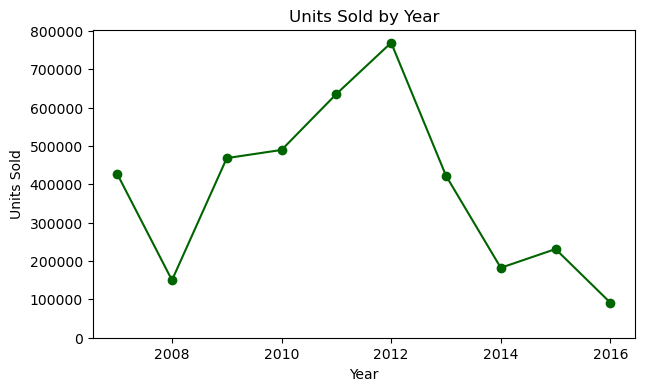

In [20]:
fig, ax = plt.subplots(figsize = (7,4))

ax.plot(sales_trend['Publishing Year'] ,sales_trend['units sold'], marker ='o',  color='darkgreen')

plt.title('Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Units Sold')
ax.set_ylim(bottom=0)

plt.show()

In [21]:
gross =df[['Publishing Year','gross_sales']]
gross_trend = gross.groupby('Publishing Year')['gross_sales'].sum().reset_index()
gross_trend = gross_trend.sort_values(by = 'Publishing Year', ascending = False).reset_index(drop=True).head(10)
gross_trend 

,Publishing Year,gross_sales
0,2016,747794.44
1,2015,895168.42
2,2014,993385.04
3,2013,1425839.77
4,2012,4003253.24
5,2011,3210878.68
6,2010,1450557.93
7,2009,2827695.59
8,2008,750578.77
9,2007,1756708.17


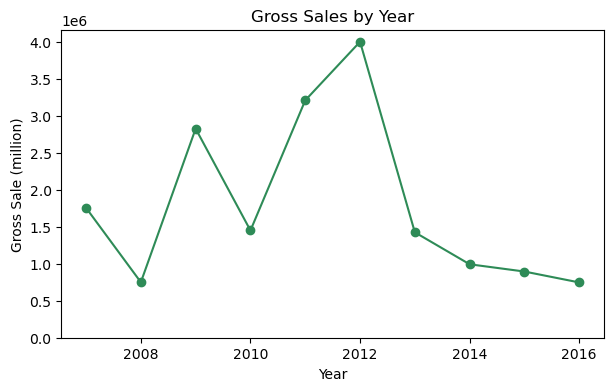

In [22]:
fig, ax = plt.subplots(figsize = (7,4))

ax.plot(gross_trend['Publishing Year'] ,gross_trend['gross_sales'], marker ='o',  color='seagreen')

plt.title('Gross Sales by Year')
plt.xlabel('Year')
plt.ylabel('Gross Sale (million)')
ax.set_ylim(bottom=0)

plt.show()

##### Top 5 Publishing Years

In [23]:
yearly_counts = df['Publishing Year'].value_counts().head(5)
yearly_counts

Publishing Year
2012    68
2011    55
2009    46
2010    44
2006    41
Name: count, dtype: int64

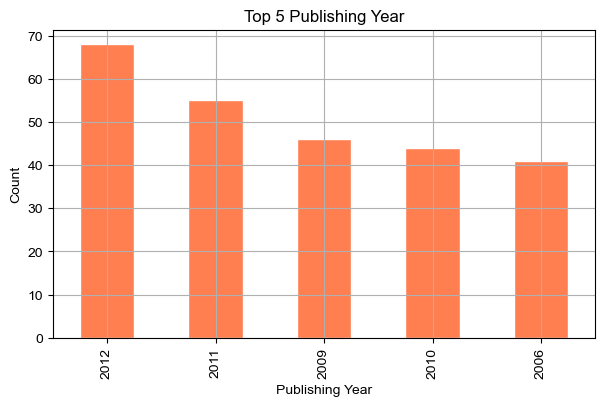

In [24]:
fig, ax = plt.subplots(figsize = (7,4))
sns.set_style("darkgrid")
yearly_counts.plot(kind='bar', color='coral')

plt.title('Top 5 Publishing Year')
plt.xlabel('Publishing Year')
plt.ylabel('Count')

plt.show()

###### Which Genre Was Most Books Published in

In [25]:
genre_count=df['genre'].value_counts()    
genre_count

genre
fiction       878
nonfiction    170
children       15
Name: count, dtype: int64

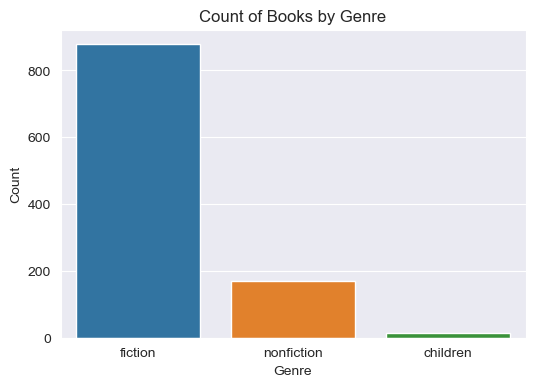

In [26]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Books by Genre')

plt.show()

###### Popular Author_Ratings

In [27]:
author = df[['Author_Rating', 'units sold']]
author_sale = author.groupby('Author_Rating')['units sold'].sum().reset_index()
author_sales= author_sale.sort_values(by='units sold', ascending = False).reset_index(drop = True)
author_sales

,Author_Rating,units sold
0,Intermediate,4930601
1,Excellent,4771018
2,Famous,344990
3,Novice,212696


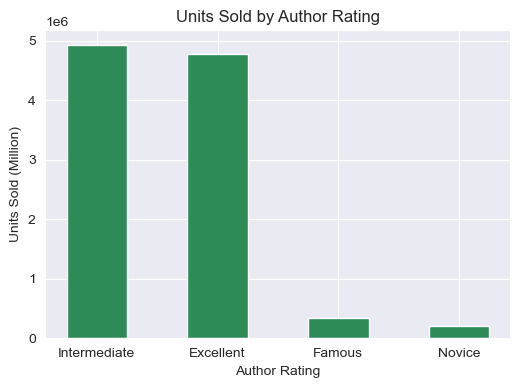

In [28]:
bar_width = 0.5

fig, ax = plt.subplots(figsize= (6,4))
ax. bar(author_sales['Author_Rating'] ,author_sales['units sold'], width = bar_width, color ='seagreen')

plt.title('Units Sold by Author Rating')
plt.xlabel('Author Rating')
plt.ylabel('Units Sold (Million)')

plt.show()

###### How are Books Avearage Rating Distributed

Text(0, 0.5, 'Frequency')

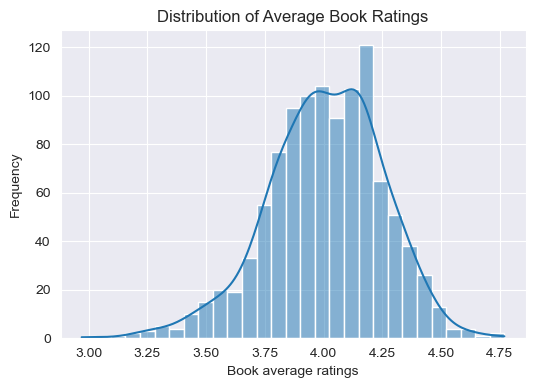

In [29]:
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data = df, x= 'Book_average_rating', kde= True)

plt.title('Distribution of Average Book Ratings')
plt.xlabel('Book average ratings')
plt.ylabel('Frequency')

###### Which Genre is The Most Popular

In [30]:
genre_unit = df[['genre', 'units sold']]
genre_unit = genre_unit.groupby('genre')['units sold'].sum().reset_index()
genre_units= genre_unit.sort_values(by='units sold', ascending = False).reset_index(drop = True)
genre_units

,genre,units sold
0,fiction,8331234
1,nonfiction,1629953
2,children,298118


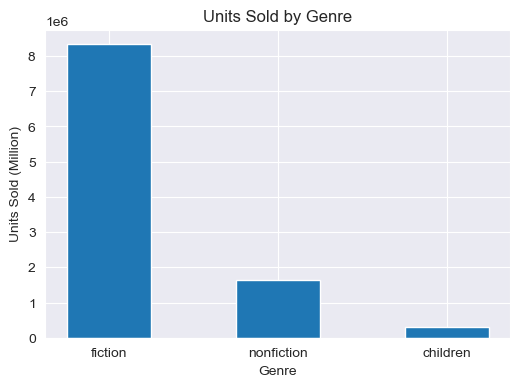

In [31]:
bar_width = 0.5

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(genre_units['genre'], genre_units['units sold'], width=bar_width)

plt.title('Units Sold by Genre')
plt.xlabel('Genre')
plt.ylabel('Units Sold (Million)')

plt.show()

###### Is There Any Correlation Between ('Book_average_rating', 'Book_ratings_count','gross_sales', 'sale price', 'units sold', 'publisher revenue')

In [32]:
df_corr = df[['Book_average_rating', 'Book_ratings_count','gross_sales', 'sale price', 'units sold', 'publisher revenue' ]]
correlation_matrix = df_corr.corr()

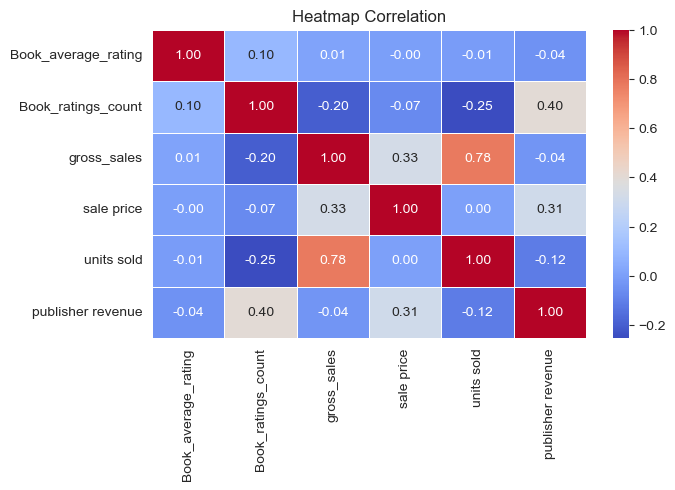

In [33]:
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Correlation')
plt.show()

###### Best Selling Authors

In [34]:
author = df[['Author', 'gross_sales', 'units sold']]
author_sale = author.groupby(['Author'])[['gross_sales', 'units sold']].sum().reset_index()
author_sales= author_sale.sort_values(by='units sold', ascending = False).reset_index(drop = True).head(10)
author_sales

,Author,gross_sales,units sold
0,Stephen King,1308083.63,278322
1,Janet Evanovich,1349600.40,181089
2,"Lemony Snicket, Brett Helquist",870931.27,158973
3,Jim Butcher,787809.37,145827
4,Robert Jordan,296991.54,133512
5,Colleen Hoover,765824.30,123522
6,Eoin Colfer,222482.43,105219
7,L.M. Montgomery,137856.33,103167
8,Jeff Kinney,412407.07,97793
9,Chuck Palahniuk,528462.66,97134


###### Which Books Are The Most Popular 

In [35]:
book = df[['Book Name', 'gross_sales', 'units sold']]
book_sale = book.groupby(['Book Name'])[['gross_sales', 'units sold']].sum().reset_index()
book_sales= book_sale.sort_values(by='units sold', ascending = False).reset_index(drop = True).head(10)
book_sales

,Book Name,gross_sales,units sold
0,Untitled Book,456756.92,89771
1,New Moon: The Complete Illustrated Movie Compa...,676544.40,61560
2,Mr Maybe,243900.72,61128
3,Maybe Someday,417504.24,61128
4,Anne of the Island,60089.04,60696
5,Also sprach Zarathustra,434214.00,59400
6,North and South,235282.32,58968
7,A Stolen Life,228387.60,57240
8,The Immortals of Meluha,169855.92,56808
9,The Lost World,556722.72,55728


###### Which Publisher is The Most Popular

In [36]:
publisher_counts =df['Publisher '].value_counts(normalize = True)
publisher_counts

Publisher 
Amazon Digital Services,  Inc.          0.560677
Random House LLC                        0.112888
Penguin Group (USA) LLC                 0.100659
HarperCollins Publishers                0.066792
Hachette Book Group                     0.060207
Simon and Schuster Digital Sales Inc    0.052681
Macmillan                               0.038570
HarperCollins Publishing                0.003763
HarperCollins Christian Publishing      0.003763
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Count of Books by Publisher')

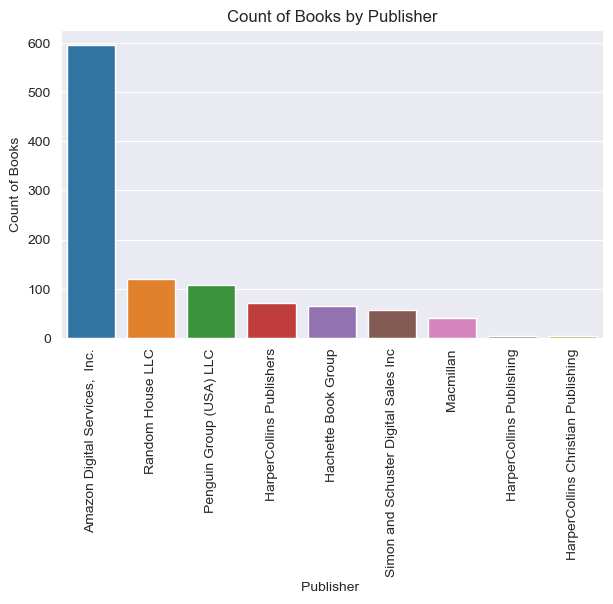

In [37]:
fig, ax= plt.subplots(figsize =(7,4))
ax = sns.countplot(x='Publisher ', data=df, order=df['Publisher '].value_counts().index)

plt.xticks(rotation=90)
plt.ylabel('Count of Books')
plt.title('Count of Books by Publisher')

## Insights

1. There was a drop in sale from 2007 to 2008. Sales continue in an uptrend and reaches its peak in **2012** with over 40 million gross sales before dropping massively from 2013 upward.

2. 68 books was published in 2012, which was the highest number of books published.

3. The most popular genre is **Fiction** with over 800 books published and over 8 million units sold.

4. Author rated **Intermediate** sold more books with over 4 million books sold followed closely by Excellent rated Author.

5. There is a strong correlation between the units sold and gross sale. Book_average_rating and sale price has no correlation with the number of units sold or gross sales.

6. The most popular book was without a name, the second most popular book was **New Moon: The Complete Illustrated Movie Companion** which was written by **Mark Cotta Vaz** and published by "Penguin Group (USA) LLC" in 2009.

7. The best selling Author was **Stephen King** wth **278,322** units of books sold.

8. Majority of the books were published by **Amazon Digital Services, Inc.** publishing over 50% of the total books published.


## Recommendations

* Fiction being the most selling genre category indicates a strong customer buying preference. Publishers can develop targeted and innovative marketing campaigns for fiction titles books .

* Publishers should identify and invest in popular fiction authors. Their established fan base can drive sales, and marketing efforts can be focused on promoting their latest releases.

* Publishers should continuously conduct market research to identify emerging trends and reader preferences. Stay informed about what is resonating with readers to guide publishing decisions.

* For the low selling genres publishers should develop creative and innovative marketing strategies to generate interest in the genre. This might involve leveraging social media, creating interactive content, or partnering with influencers who have a specific interest in the niche.

* Publishers should consider offering bundle deals or promotions for the low-selling genre. Combining books at a discounted rate can encourage readers to explore new titles within the genre.